In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# Lendo informações onlines referentes as ações da Apple e da Microsoft nos últimos 5 anos.

In [2]:
ativos = ['AAPL','MSFT']

dados = pd.DataFrame()

for i in ativos:
    dados[i] = wb.DataReader(i, data_source = 'yahoo', start = '2017-1-1')['Adj Close']


In [3]:
#Pegando os 5 ultimos valores das ações.
dados.tail().round()

,AAPL,MSFT
Date,,
2022-09-12,163.0,267.0
2022-09-13,154.0,252.0
2022-09-14,155.0,252.0
2022-09-15,152.0,245.0
2022-09-16,151.0,245.0


In [4]:
#Pegando os 5 primeiro valores das ações.
dados.head().round()

,AAPL,MSFT
Date,,
2017-01-03,27.0,58.0
2017-01-04,27.0,58.0
2017-01-05,27.0,58.0
2017-01-06,28.0,58.0
2017-01-09,28.0,58.0


In [5]:
#Informações sobre os dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1437 entries, 2017-01-03 to 2022-09-16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1437 non-null   float64
 1   MSFT    1437 non-null   float64
dtypes: float64(2)
memory usage: 33.7 KB


In [6]:
#Verificando se há dados nulos
dados.isnull().sum()

AAPL    0
MSFT    0
dtype: int64

In [7]:
dados.nunique()

AAPL    1418
MSFT    1402
dtype: int64

In [8]:
#Usando esse método, conseguimos ver que elas não fecharam no mesmo valor nenhuma vez.
dados.duplicated().sum()

0

In [9]:
#Esatisticas descritivas brutas sobre as ações
dados.describe().round()

,AAPL,MSFT
count,1437.0,1437.0
mean,84.0,167.0
std,48.0,84.0
min,27.0,58.0
25%,42.0,94.0
50%,60.0,140.0
75%,130.0,243.0
max,181.0,341.0


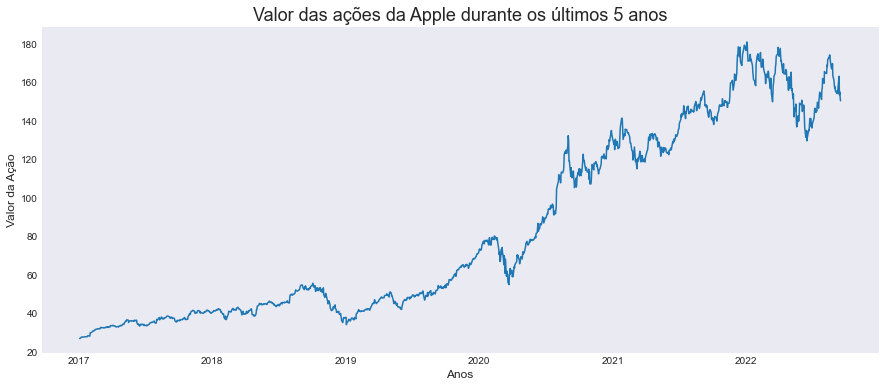

In [10]:
#Aplicando conhecimentos básicos de séries temporais.
##GRAFICO PARA APPLE
plt.style.use('seaborn-dark')
plt.figure(figsize=(15,6))
plt.plot(dados.index, dados['AAPL'])
plt.title('Valor das ações da Apple durante os últimos 5 anos', fontsize=18)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Valor da Ação', fontsize=12);

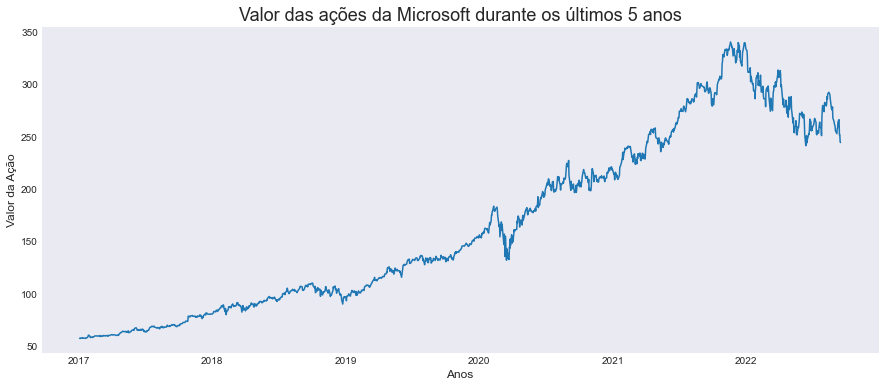

In [11]:
##GRAFICO PARA MICROSOFT
plt.style.use('seaborn-dark')
plt.figure(figsize=(15,6))
plt.plot(dados.index, dados['MSFT'])
plt.title('Valor das ações da Microsoft durante os últimos 5 anos', fontsize= 18)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Valor da Ação', fontsize=12);

# - Medindo o retorno dos ativos (logaritimico).

In [12]:
retorno_log_dados = np.log(dados/dados.shift(1))
retorno_log_dados

,AAPL,MSFT
Date,,
2017-01-03,NaN,NaN
2017-01-04,-0.001120,-0.004484
2017-01-05,0.005073,0.000000
2017-01-06,0.011086,0.008630
2017-01-09,0.009118,-0.003188
...,...,...
2022-09-12,0.037785,0.008247
2022-09-13,-0.060472,-0.056547
2022-09-14,0.009510,0.000912


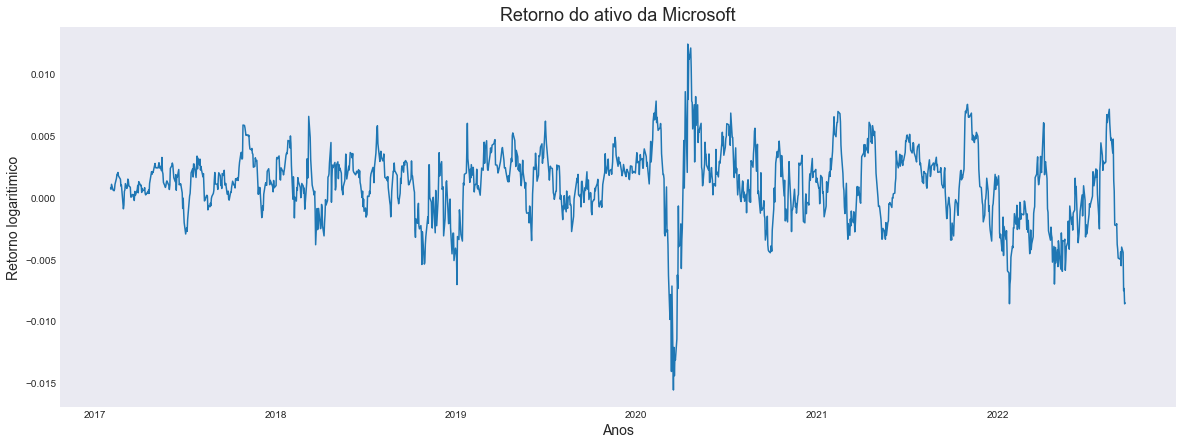

In [13]:
##GRAFICO DO RETORNO PARA O ATIVO DA MICROSOFT USANDO UMA MÉDIA MÓVEL DE 20 DIAS.
media_movel_msft = retorno_log_dados['MSFT'].rolling(20).mean()
plt.style.use('seaborn-dark')
plt.figure(figsize=(20,7))
plt.plot(retorno_log_dados.index, media_movel_msft)
plt.title('Retorno do ativo da Microsoft', fontsize= 18)
plt.xlabel('Anos', fontsize=14)
plt.ylabel('Retorno logaritimico', fontsize=14);

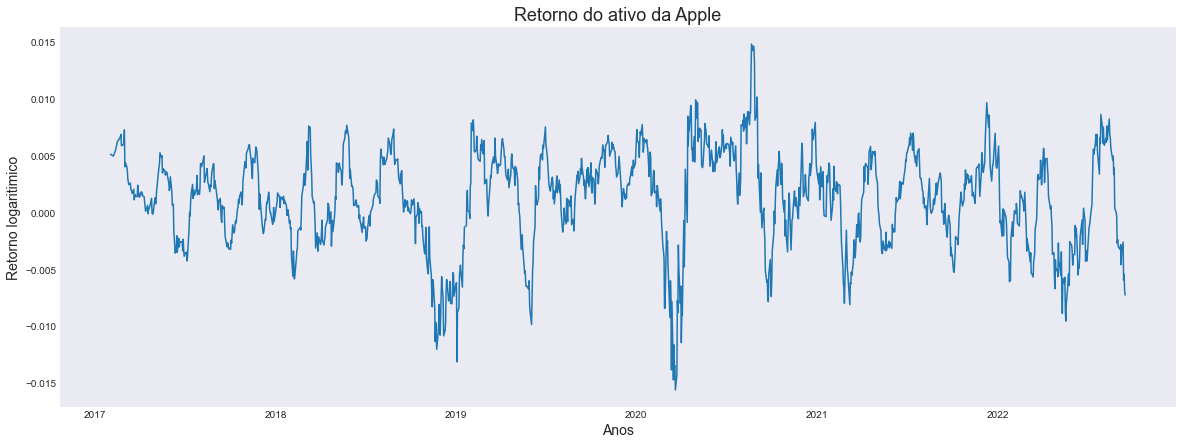

In [14]:
##GRAFICO DO RETORNO PARA O ATIVO DA APPLE USANDO UMA MÉDIA MÓVEL DE 20 DIAS.
media_movel_aapl = retorno_log_dados['AAPL'].rolling(20).mean()
plt.style.use('seaborn-dark')
plt.figure(figsize=(20,7))
plt.plot(retorno_log_dados.index, media_movel_aapl)
plt.title('Retorno do ativo da Apple', fontsize= 18)
plt.xlabel('Anos', fontsize=14)
plt.ylabel('Retorno logaritimico', fontsize=14);

# -Um pouco de estatística sobre o retorno do ativo da Apple.

In [15]:
#Média do retono logaritimico diario das ações da apple

appl_ret_diario = retorno_log_dados['AAPL'].mean()
appl_ret_diario

0.0011917446237488078

In [16]:
#Média anual, contando os dias em que a bolsa opera
appl_ret_anual = retorno_log_dados['AAPL'].mean()*250
appl_ret_anual

0.29793615593720196

In [17]:
#Desvio-padrão diário
appl_desv_diario = retorno_log_dados['AAPL'].std()
appl_desv_diario

0.019502196372526075

In [18]:
#Desvio-padrão anual
appl_desv_anual = retorno_log_dados['AAPL'].std() *250 **0.5
appl_desv_anual

0.30835679956528006

# - Um pouco de estatística sobre o retorno do ativo da Microsoft

In [19]:
#Média do retono logaritimico diario das ações da microsoft

micro_ret_diario = retorno_log_dados['MSFT'].mean()
micro_ret_diario

0.0010049249744699088

In [20]:
#Média anual

micro_ret_anual = retorno_log_dados['MSFT'].mean() * 250
micro_ret_anual

0.2512312436174772

In [21]:
#Desvio-padrão

micro_ret_diario = retorno_log_dados['MSFT'].std()
micro_ret_diario

0.017908160018815716

In [22]:
#Desvio-padrão anual

micro_ret_anual = retorno_log_dados['MSFT'].std() * 250**0.5
micro_ret_anual

0.2831528718111074

# - Considerações finais 